# Predizione della possibilità di avere il diabete

Progetto di programmazione di applicazioni di Data Intensive, A.A. 2023/2024

**A cura di: Lorenzo Rigoni**

Email: lorenzo.rigoni2@studio.unibo.it

## Introduzione

Per il mio progetto ho deciso di utilizzare un dataset che mi permettesse di prevedere se un paziente potrebbe avere il diabete. Il dataset è stato preso da _Kaggle_: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Caricamento delle librerie

Innanzitutto, occorre importare le librerie che saranno utili durante lo sviluppo del progetto. Nello specifico, queste librerie sono:
- *NumPy*: utile per operazioni su array a N dimensioni
- *pandas*: utile per caricare e manipolare i dati che usermo
- *matplotlib*: utile per rappresentare su grafici i nostri dati

Le librerie verranno usate con i loro alias convenzionali e, per quanto riguarda i grafici, verrà abilitato l'inserimento direttamente nel notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Caricamento dei dati

Dopo aver incluso le librerie necessarie, andiamo a scaricare i dati da un file _CSV_ e inseriamoli in un dataframe creato con la libreria _Pandas_.

In [2]:
import os.path

FILE = "diabetes_prediction_dataset.csv"
if not os.path.exists(FILE):
    print("Dataset not found")

patients = pd.read_csv(FILE)

In [3]:
patients.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 9 entries, gender to diabetes
dtypes: float64(3), int64(4), object(2)
memory usage: 17.3 MB


In [4]:
patients.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [5]:
patients.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Come è possibile vedere, il dataset ha 100000 entries e 9 features. Quest'ultime, sono nello specifico:

- `gender`: il sesso del paziente
- `age`: l'età del paziente
- `hypertension`: indica se il paziente soffre di ipertensione oppure no
- `heart_disease`: indica se il paziente soffre di problemi al cuore
- `smoking_history`: indica se il paziente è un fumatore
- `bmi`: l'indice di massa del paziente
- `HbA1c_level`: (emoglobina A1c) è una misura del livello medio di zucchero nel sangue del paziente negli ultimi 2-3 mesi
- `blood_glucose_level`: indica il quantitativo di glucosio del paziente
- `diabetes`: indica se il paziente ha il diabete oppure no

Chiaramente, la nostra variabile target sarà `diabetes`, la quale avrà valore `0` se il paziente non ha il diabete e `1` se invece lo ha.

Per ridurre lo spazio in memoria utilizzato dal dataset, andiamo a specificare le colonne categoriche.

In [6]:
categorical = ["smoking_history"]

patients = pd.read_csv(FILE, dtype={x: "category" for x in categorical})

patients['gender'] = patients['gender'].replace({'Female': 1, 'Male': 0, 'Other': 2})
patients['gender'] = patients['gender'].astype(int)

patients.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 9 entries, gender to diabetes
dtypes: category(1), float64(3), int32(1), int64(4)
memory usage: 5.8 MB


## Analisi generale dei dati

Andiamo a esplorare i dati che abbiamo. Innanzitutto, vediamo ogni feature quanti valori diversi ha.

In [7]:
patients.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

Possiamo notare come abbiamo molte età differenti con anche molte situazioni fisiche diverse.

In [8]:
patients.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.585880,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,0.492937,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


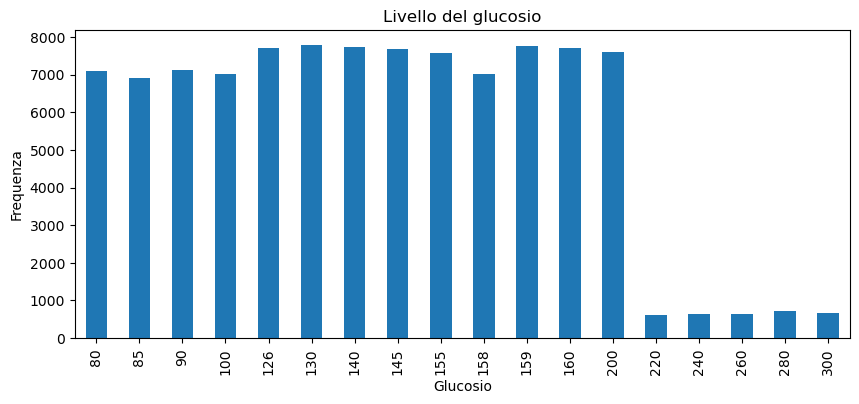

In [9]:
patients['blood_glucose_level'].value_counts()[:20].sort_index().plot.bar(figsize=(10, 4))
plt.title("Livello del glucosio")
plt.xlabel("Glucosio")
plt.ylabel("Frequenza")
plt.show();

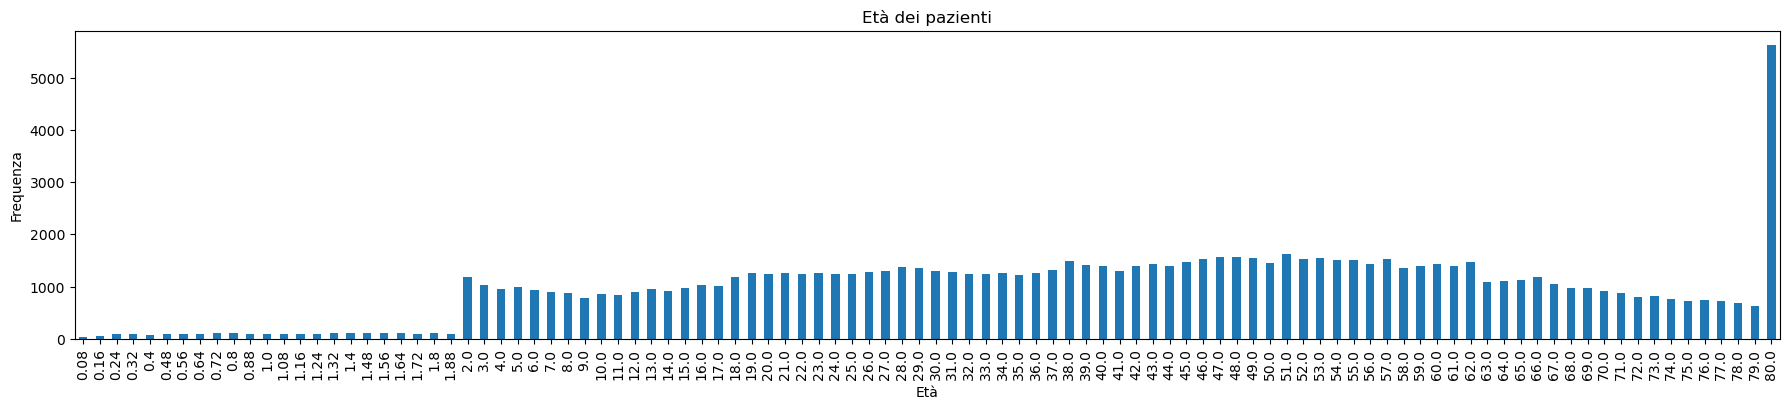

In [10]:
patients['age'].value_counts().sort_index().plot.bar(figsize=(22, 4))
plt.title("Età dei pazienti")
plt.xlabel("Età")
plt.ylabel("Frequenza")
plt.show();

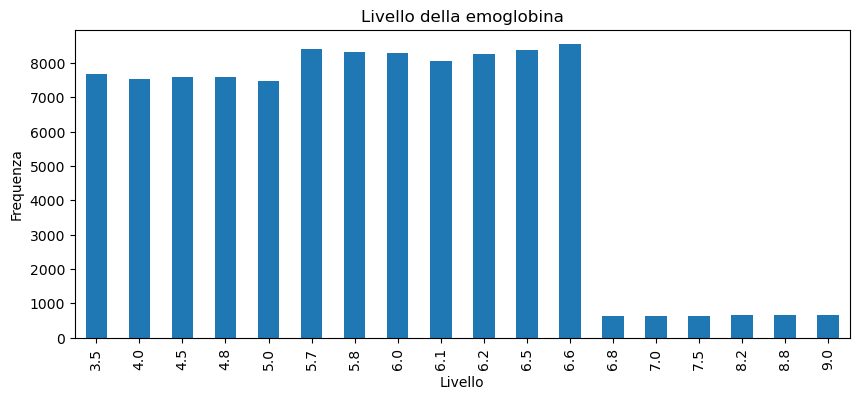

In [11]:
patients['HbA1c_level'].value_counts().sort_index().plot.bar(figsize=(10, 4))
plt.title("Livello della emoglobina")
plt.xlabel("Livello")
plt.ylabel("Frequenza")
plt.show();

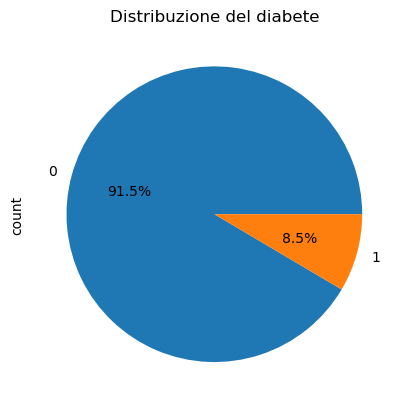

In [12]:
patients['diabetes'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribuzione del diabete");

Dai grafici proposti, sappiamo che la maggior parte delle persone ha il livello di glucosio sotto il 200, il livello di emoglobina sotto il 6.8 e più di 5000 persone hanno 80 anni. Può risultare interessante anche vedere la correlazione tra il diabete e le altre features.

C:\Users\rigon\AppData\Local\Temp\ipykernel_20340\2758774480.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = patients.groupby('smoking_history')['diabetes'].value_counts().unstack()


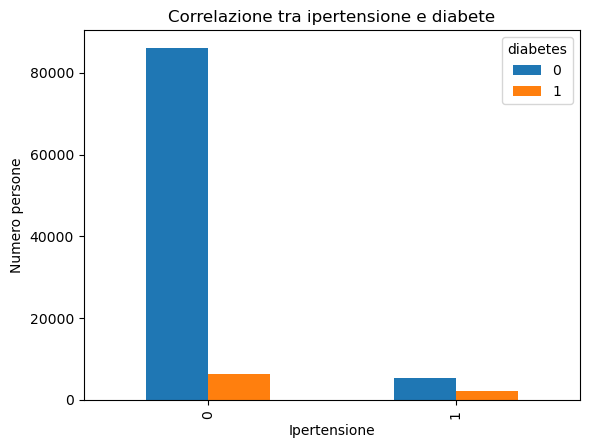

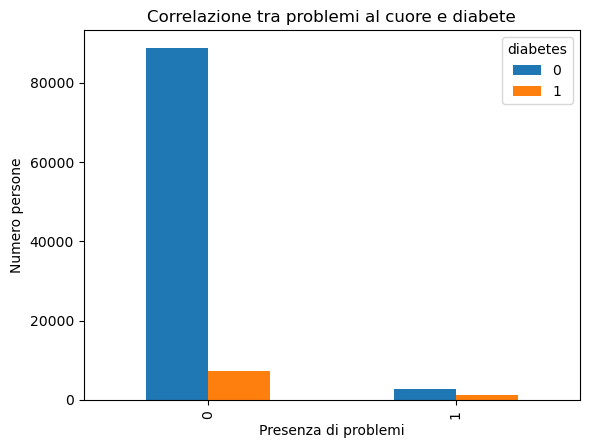

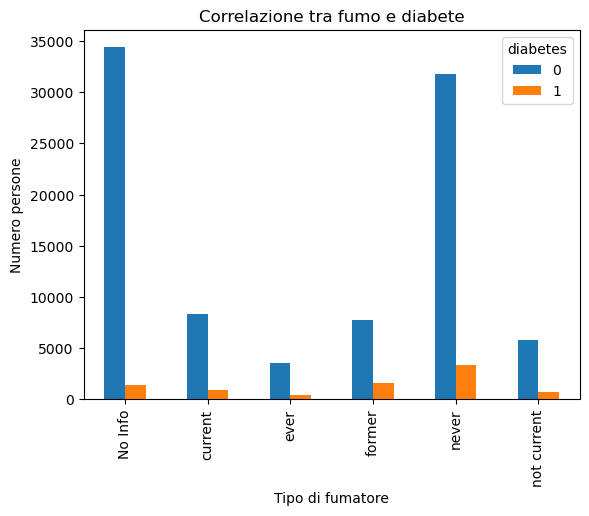

In [13]:
grouped_data = patients.groupby('hypertension')['diabetes'].value_counts().unstack()

grouped_data.plot(kind='bar')
plt.title('Correlazione tra ipertensione e diabete')
plt.xlabel('Ipertensione')
plt.ylabel('Numero persone')

grouped_data = patients.groupby('heart_disease')['diabetes'].value_counts().unstack()

grouped_data.plot(kind='bar')
plt.title('Correlazione tra problemi al cuore e diabete')
plt.xlabel('Presenza di problemi')
plt.ylabel('Numero persone')

grouped_data = patients.groupby('smoking_history')['diabetes'].value_counts().unstack()

grouped_data.plot(kind='bar')
plt.title('Correlazione tra fumo e diabete')
plt.xlabel('Tipo di fumatore')
plt.ylabel('Numero persone')
plt.show();

plt.show();

## Preparazione dei dati

Andiamo ora a preparare i dati, svolgendo due compiti principali:
- gestione dei valori nulli
- gestione delle feature categoriche
- divisione dei dati in _traing set_ e _validation set_

Innanzitutto, andiamo a controllare se abbiamo valori nulli.

In [14]:
patients.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Non abbiamo valori nulli, dunque non dobbiamo intervenire su questo aspetto. Ora andiamo a convertire la feature categorica in valore numerico tramite il metodo di binarizzazione.

In [15]:
smoke_dumm = patients['smoking_history'].str.get_dummies()

In [16]:
patients_num = patients.merge(smoke_dumm, left_index=True, right_index=True)
patients_num = patients_num.drop(columns=["smoking_history"])
patients_num = patients_num.rename(columns={"never": "never smoke", "current": "current smoker", "ever": "ever smoke", 
                                            "No Info": "no info smoke", "former": "former smoker", "not current": "not current smoker"})
patients_num.head(1)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,no info smoke,current smoker,ever smoke,former smoker,never smoke,not current smoker
0,1,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0


Come ultimo passaggio, andiamo a isolare la nostra variabile target `diabetes` e a dividere i nostri dati in _training set_ e _validation set_

In [17]:
from sklearn.model_selection import train_test_split

X = patients_num.drop(columns="diabetes")
y = patients_num['diabetes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

## Preparazione del modello

Prima di creare il modello che utilizzaremo per la predizione, ci occorre importare tutte le librerie necessarie.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Creazione del modello

Dato che dobbiamo predire una variabile binaria, andremo a provare dei modelli di classificazione.

### Regressione logistica

Il primo modello che andremo a testare sarà quello di _regressione logistica_. Oltre a questo, svolgeremo una _grid search_ per trovare i migliori iperparametri e utilizzeremo la libreria _StratifiedKFold_ per una eguale distribuzione delle classi tra fold.

In [19]:
from sklearn.linear_model import LogisticRegression

log_model = Pipeline([
    ("scaler", None),
    ("linreg", LogisticRegression())
])

log_grid = {
    "scaler": [None, StandardScaler()],
    "linreg__penalty": ['l1', 'l2'],
    "linreg__solver": ['saga', 'liblinear'],
    "linreg__C": [1, 0.5, 0.1]
}

skf = StratifiedKFold(5, shuffle=True, random_state=42)
log_gs = GridSearchCV(log_model, log_grid, cv=skf)
log_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('linreg', LogisticRegression())]),
             param_grid={'linreg__C': [1, 0.5, 0.1],
                         'linreg__penalty': ['l1', 'l2'],
                         'linreg__solver': ['saga', 'liblinear'],
                         'scaler': [None, StandardScaler()]})

In [20]:
print('Parametri migliori scelti:', log_gs.best_params_)

Parametri migliori scelti: {'linreg__C': 0.1, 'linreg__penalty': 'l1', 'linreg__solver': 'liblinear', 'scaler': None}


In [21]:
y_pred = log_gs.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     30531
           1       0.87      0.61      0.71      2803

    accuracy                           0.96     33334
   macro avg       0.92      0.80      0.85     33334
weighted avg       0.96      0.96      0.96     33334



In [22]:
log_cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(log_cm,
             index=["Si Diab", "No Diab"],
             columns=["Si Diab", "No Diab"])

,Si Diab,No Diab
Si Diab,30280,251
No Diab,1106,1697


In [23]:
print("MSE:", mean_squared_error(y_val, y_pred))

MSE: 0.040709185816283674


Come possiamo vedere dalle metriche stampate, il modello di regressione logistica ha un'accuracy molto alta (96%). Inoltre, la matrice di confusione ci dice che, su 30531 casi di cui siamo sicuri che abbiano il diabete, ben 30280 sono stati predetti correttamente. Andiamo a vedere quali sono state le features più incisive nella predizione.

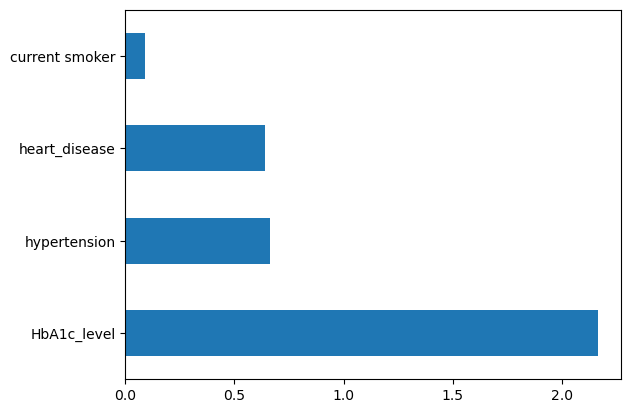

In [24]:
log_best_params = pd.Series(log_gs.best_estimator_[1].coef_[0], index=X_train.columns)
log_best_params.nlargest(4).plot(kind='barh');

Vediamo che la feature più rilevante è stata il livello di emoglobina, che ha senso visti i nostri studi nella fase di **analisi generale dei dati**.

### Perceptron

Il secondo modello di classificazione che andremo a provare è _Perceptron_. Anche qui svolgeremo una _grid search_ e useremo la libreria _StrtifiedKFold_.

In [25]:
from sklearn.linear_model import Perceptron

perc_model = Pipeline([
    ("scaler", None),
    ("linreg", Perceptron(random_state=42))
])

perc_grid = {
    "scaler": [None, StandardScaler()],
    "linreg__penalty": ['l1', 'l2'],
    "linreg__alpha": [0.0001, 0.001, 0.01, 0.1, 1]
}

perc_gs = GridSearchCV(perc_model, perc_grid, cv=skf)
perc_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('linreg',
                                        Perceptron(random_state=42))]),
             param_grid={'linreg__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'linreg__penalty': ['l1', 'l2'],
                         'scaler': [None, StandardScaler()]})

In [26]:
print('Parametri migliori scelti:', perc_gs.best_params_)

Parametri migliori scelti: {'linreg__alpha': 0.0001, 'linreg__penalty': 'l2', 'scaler': StandardScaler()}


In [27]:
y_pred = perc_gs.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     30531
           1       0.67      0.57      0.62      2803

    accuracy                           0.94     33334
   macro avg       0.82      0.77      0.79     33334
weighted avg       0.94      0.94      0.94     33334



In [28]:
perc_cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(perc_cm,
             index=["Si Diab", "No Diab"],
             columns=["Si Diab", "No Diab"])

,Si Diab,No Diab
Si Diab,29741,790
No Diab,1196,1607


In [29]:
print("MSE:", mean_squared_error(y_val, y_pred))

MSE: 0.05957880842383152


Anche in questo caso, abbiamo un'alta accuracy (96%) ma anche un MSE più alto. Andiamo a vedere quali sono state le features più incisive nella predizione.

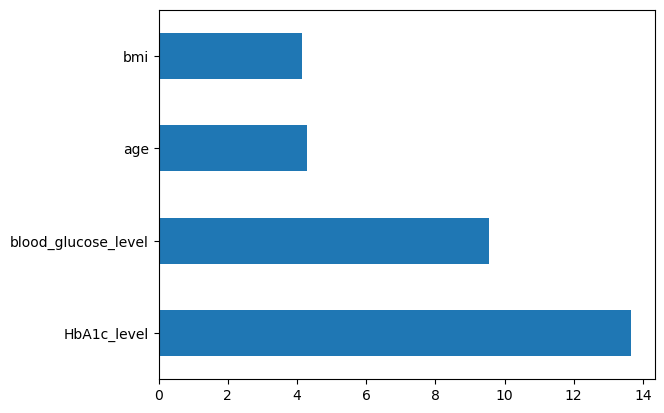

In [31]:
perc_best_params = pd.Series(perc_gs.best_estimator_[1].coef_[0], index=X_train.columns)
perc_best_params.nlargest(4).plot(kind='barh');

Possiamo vedere che anche qui la feature più rilevante è stata il livello di emoglobina, ma c'è anche da dire che è stato preso in considerazione molto anche il livello medio di glucosio del sangue.

### Alberi decisionali

Il terzo modello che andremo a testare è quello degli _alberi decisionali_.

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline([
    ("scaler", None),
    ("linreg", DecisionTreeClassifier())
])

tree_grid = {
    "scaler": [None, StandardScaler()],
    "linreg__max_depth": [2, 4, 8, 16, 32]
}

gs_tree = GridSearchCV(tree_model, tree_grid, cv=skf)
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', None),
                                       ('linreg', DecisionTreeClassifier())]),
             param_grid={'linreg__max_depth': [2, 4, 8, 16, 32],
                         'scaler': [None, StandardScaler()]})

In [33]:
print('Parametri migliori scelti:', gs_tree.best_params_)

Parametri migliori scelti: {'linreg__max_depth': 2, 'scaler': None}


In [34]:
y_pred = gs_tree.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30531
           1       1.00      0.67      0.80      2803

    accuracy                           0.97     33334
   macro avg       0.99      0.83      0.89     33334
weighted avg       0.97      0.97      0.97     33334



In [35]:
tree_cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(tree_cm,
             index=["Si Diab", "No Diab"],
             columns=["Si Diab", "No Diab"])

,Si Diab,No Diab
Si Diab,30531,0
No Diab,939,1864


In [36]:
print("MSE:", mean_squared_error(y_val, y_pred))

MSE: 0.028169436611267775


Il modello degli _alberi decisionali_, per ora, si è rivelato il migliore per accuracy, MSE e R-squared. Andiamo a vedere quali scelte ha preso l'albero.

In [37]:
tree_model = DecisionTreeClassifier(max_depth=2)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

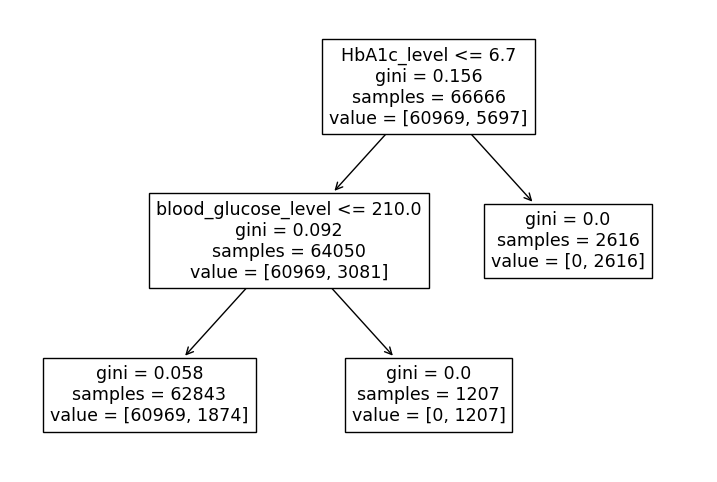

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(9, 6))
plot_tree(tree_model, feature_names=X_train.columns.to_list());

Anche qui hanno inciso il livello di emoglobina e il livello medio di glucosio nel sangue.

### Random forest

Dato che abbiamo utilizzato gli _alberi decisionali_, un altro modello di classificazione interessante che possiamo utilizzare è quello della _random forest_.

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = Pipeline([
    ("rfc", RandomForestClassifier(n_jobs=-1))
])

rfc_grid = {
    "rfc__max_depth": [2, 4, 6, 8, 10],
    "rfc__max_samples": [0.1, 0.2, 0.5, 1],
    "rfc__max_features": ["sqrt", "log2"],
    "rfc__n_estimators": [100, 200, 300]
}

rfc_gs = GridSearchCV(rfc_model, rfc_grid, cv=skf)
rfc_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(n_jobs=-1))]),
             param_grid={'rfc__max_depth': [2, 4, 6, 8, 10],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__max_samples': [0.1, 0.2, 0.5, 1],
                         'rfc__n_estimators': [100, 200, 300]})

In [45]:
print('Parametri migliori scelti:', rfc_gs.best_params_)

Parametri migliori scelti: {'rfc__max_depth': 10, 'rfc__max_features': 'log2', 'rfc__max_samples': 0.5, 'rfc__n_estimators': 100}


In [46]:
y_pred = rfc_gs.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30531
           1       1.00      0.67      0.80      2803

    accuracy                           0.97     33334
   macro avg       0.99      0.83      0.89     33334
weighted avg       0.97      0.97      0.97     33334



In [47]:
rfc_cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(rfc_cm,
             index=["Si Diab", "No Diab"],
             columns=["Si Diab", "No Diab"])

,Si Diab,No Diab
Si Diab,30531,0
No Diab,937,1866


In [48]:
print("MSE:", mean_squared_error(y_val, y_pred))

MSE: 0.028109437811243775


Possiamo vedere che i risultati ottenuti dal _random forest_ sono molto simili a quelli ottenuti dagli _alberi decisionali_. Andiamo a vedere quali features si sono rivelate le più significative.

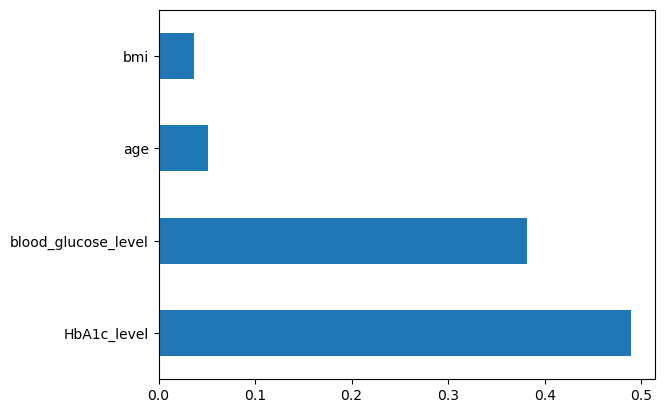

In [56]:
rfc_best_params = pd.Series(rfc_gs.best_estimator_[0].feature_importances_, index=X_train.columns)
rfc_best_params.nlargest(4).plot(kind='barh');

Anche in questo caso, sono stati il livello di emoglobina e il livello medio di glucosio le features più importanti.